# Bin Packing Lab

- Authors:
  - Arvind Shastri, shasta2@mcmaster.ca
  - Stanley Nguyen, nguyes44@mcmaster.ca
- Group ID on Avenue: 48
- Gitlab URL: https://gitlab.cas.mcmaster.ca/shasta2/l2-bin-packing.git

## How to use the provided code?

In [1]:
from macpacking.reader import DatasetReader, BinppReader, JburkardtReader
from macpacking.model  import Online, Offline
from macpacking.algorithms.online import \
    FirstFit, BestFit, WorstFit
from macpacking.algorithms.offline import \
    BenMaier, FirstFitDecreasing, BestFitDecreasing, WorstFitDecreasing


Now that the business code is imported, we can load an existing dataset

In [2]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Dataset: _datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt
  - Bin Capacity: 100
  - Objects to pack: [8, 8, 12, 13, 13, 14, 15, 17, 18, 19, 20, 23, 30, 37, 37, 39, 40, 43, 43, 44, 44, 50, 51, 61, 61, 62, 62, 63, 66, 67, 69, 70, 71, 72, 75, 76, 76, 79, 83, 83, 88, 92, 92, 93, 93, 97, 97, 97, 99, 100]


Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [3]:
strategy: Offline = BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

nb_bins = 31
[[40], [43, 43, 14], [50, 44], [51, 44], [61], [61, 39], [62], [62, 37], [63, 37], [66], [67], [69], [70, 30], [71], [72, 13, 13], [75, 18], [76, 19], [76, 23], [79, 20], [83, 15], [83, 17], [88, 12], [92, 8], [92, 8], [93], [93], [97], [97], [97], [99], [100]]


So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [4]:
from helpers import list_case_files
from sample_bench import Benchmark

benchmark = Benchmark()
algorithms = [FirstFit(), BestFit(), WorstFit(), FirstFitDecreasing(), BestFitDecreasing(), WorstFitDecreasing()]  # noqa: E501
CASES = './_datasets/binpp/N2C2W2'
cases = list_case_files(CASES)


print("Analysis of Average Bins")
print("─" * 24)
benchmark.numberBins(cases, BinppReader, algorithms)

print("Analysis of Average Bin Usage as Percentage")
print("─" * 43)
benchmark.binUsage(cases, BinppReader, algorithms)

print("Analysis of Average Remaining Space")
print("─" * 35)
benchmark.remainingSpace(cases, BinppReader, algorithms)

print("Analysis of Average Comparisons")
print("─" * 31)
benchmark.numberComparisons(cases, BinppReader, algorithms)

Analysis of Average Bins
────────────────────────
FirstFit:            55.75     
BestFit:             55.05     
WorstFit:            61.35     
FirstFitDecreasing:  52.6      
BestFitDecreasing:   52.6      
WorstFitDecreasing:  52.65     


Analysis of Average Bin Usage as Percentage
───────────────────────────────────────────
FirstFit:            89.3086   
BestFit:             90.4392   
WorstFit:            81.151    
FirstFitDecreasing:  94.6919   
BestFitDecreasing:   94.6919   
WorstFitDecreasing:  94.5991   


Analysis of Average Remaining Space
───────────────────────────────────
FirstFit:            12.8297   
BestFit:             11.473    
WorstFit:            22.6187   
FirstFitDecreasing:  6.3697    
BestFitDecreasing:   6.3697    
WorstFitDecreasing:  6.4811    


Analysis of Average Comparisons
───────────────────────────────
FirstFit:            2454.65   
BestFit:             2795.55   
WorstFit:            3028.0    
FirstFitDecreasing:  2699.45   
BestFitDecreasin

In [5]:
listOfBinppCases = [
    './_datasets/binpp/N1C1W1/N1C1W1_A.BPP.txt',
    './_datasets/binpp/N1C3W4/N1C3W4_A.BPP.txt',
    './_datasets/binpp/N2C1W1/N2C1W1_A.BPP.txt',
    './_datasets/binpp/N2C3W4/N2C3W4_A.BPP.txt',
    './_datasets/binpp/N3C1W1/N3C1W1_A.BPP.txt',
    './_datasets/binpp/N3C3W4/N3C3W4_A.BPP.txt',
    './_datasets/binpp/N4C1W1/N4C1W1_A.BPP.txt',
    './_datasets/binpp/N4C3W4/N4C3W4_A.BPP.txt'
]

binppHardCases = './_datasets/binpp-hard'
jburkardtCases = './_datasets/jburkardt'
listOfBinppHardCases = list_case_files(binppHardCases)
listOfJburkardtCases = list_case_files(jburkardtCases)


# runner = pyperf.Runner()
# execTime(binppCases, BinppReader, algorithms, runner)
# execTime(listOfBinppHardCases, BinppReader, algorithms, runner)
# execTime(listOfJburkardtCases, JburkardtReader, algorithms, runner)

# #####

In [6]:
from oracle_compare import OracleReader

oracle = OracleReader()

binppCSV = './_datasets/binpp.csv'
binppHardCSV = './_datasets/binpp-hard.csv'
jburkardtCSV = './_datasets/jburkardt.csv'

binppDict = {}
binppHardDict = {}
jburkardtDict = {}

with open(binppCSV, 'r') as binppFile:
    oracle.readCSV(binppFile, binppDict)
with open(binppHardCSV, 'r') as binppHardFile:
    oracle.readCSV(binppHardFile, binppHardDict)
with open(jburkardtCSV, 'r') as jburkardtFile:
    oracle.readCSV(jburkardtFile, jburkardtDict)

    
algorithms = [FirstFit(), BestFit(), WorstFit(), FirstFitDecreasing(), BestFitDecreasing(), WorstFitDecreasing()]
reader = JburkardtReader
dictionary = jburkardtDict

#boolean to print
plotList1 = oracle.binNumber(listOfJburkardtCases, reader, algorithms, dictionary, False)

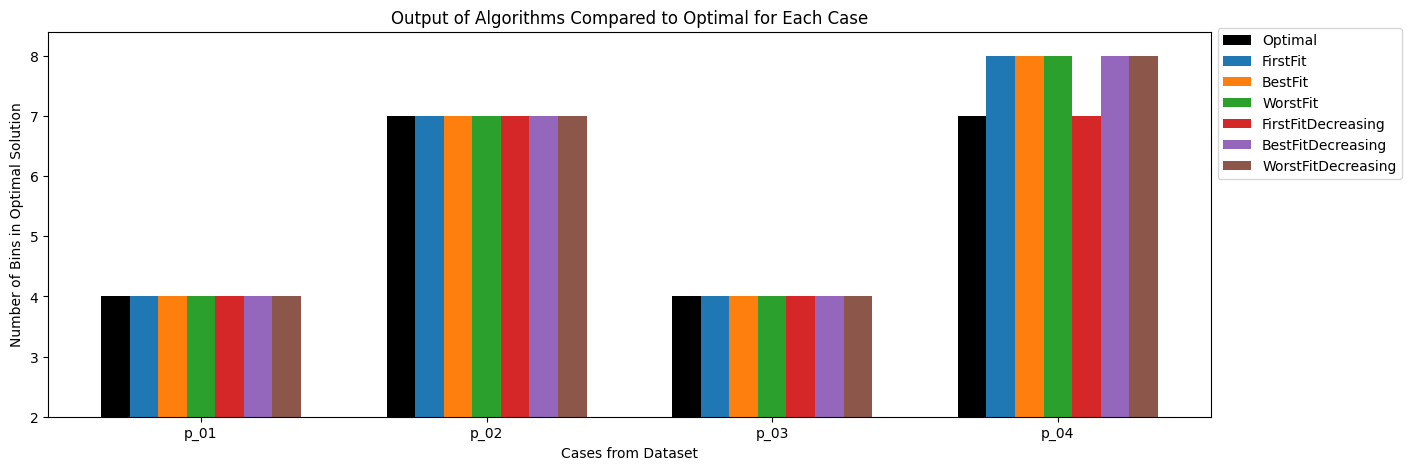

In [7]:
from plotter import Plotter
from helpers import getListCaseNames

caseNameList = getListCaseNames(listOfJburkardtCases, JburkardtReader)

plot = Plotter()
plot.oraclePlot2(plotList1, caseNameList)

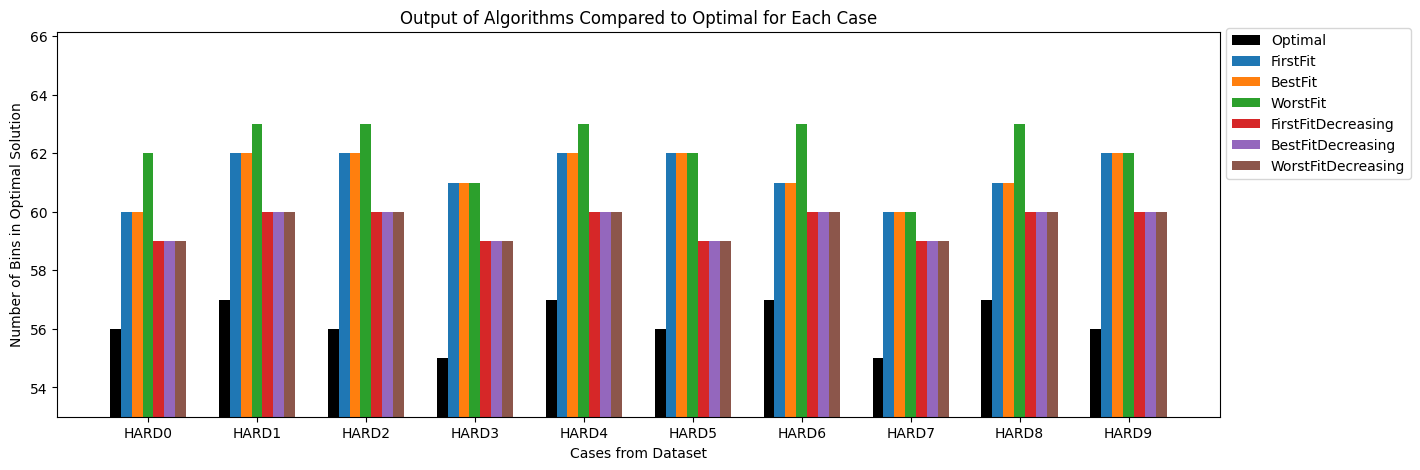

In [8]:
reader = BinppReader
dictionary = binppHardDict

plotList2 = oracle.binNumber(listOfBinppHardCases, reader, algorithms, dictionary, False)
caseNameList2 = getListCaseNames(listOfBinppHardCases, reader)

plot.oraclePlot2(plotList2, caseNameList2)

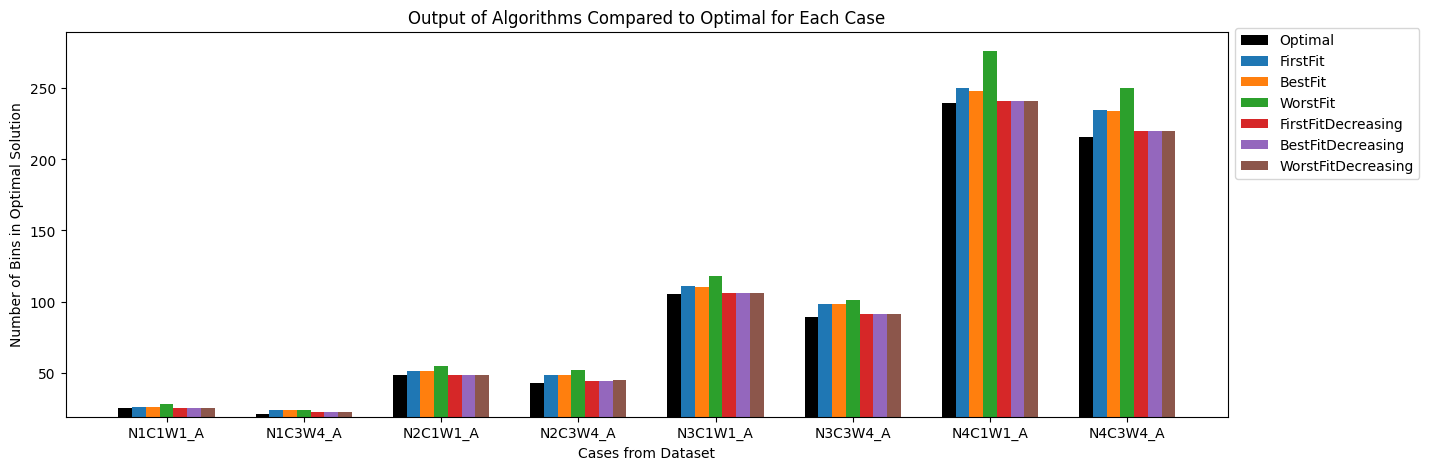

In [9]:
reader = BinppReader
dictionary = binppDict

plotList3 = oracle.binNumber(listOfBinppCases, reader, algorithms, dictionary, False)
caseNameList3 = getListCaseNames(listOfBinppCases, reader)

plot.oraclePlot2(plotList3, caseNameList3)

## SOLID Codebase


This codebase follows the open-close principle, particularly in the way it implements
the algorithms and readers. As there are abstract base classes "online" and "offline" that define
what methods that any online/offline algorithm should have, this allows the code to 
be open for extension, as we simply inherit from the "online" or "offline" class to
add the respective algorithm. It is closed for modification as we do not need to 
modify existing classes to implement a new algorithm.
The same applies to readers, as we have the abstract base class "DatasetReader"
that determines what methods each type of reader should have. This is open for
extension because as we add new readers to accomodate for new types of data, we 
simply inherit from the "DatasetReader" class. It is closed for modification as we 
do not need to modify existing classes to implement a new reader.

Each of the individual algorithms follow the single responsibility principle. This 
is because in the class of each algorithm, there is only one task that the class must
accomplish, and that is to provide the process of bin packing (in their respective way).




## Dimensions of Dataset

binpp - For each instance of the bin packing problem, we are provided with a single
file. The first line contains the number of items, n. The second line contains
the max capacity of each bin, c. The remaining lines contain the weights of 
each individual object, beginning at object 1 and ending at object n. This structure
is reflected in the BinppReader, as we read the first line as the number of objects,
the second line as the capacity, then the third line and onward as item weights. 
The algorithms do not directly use the number of items, n.

binpp-hard - Identical to binpp, as we are given a single file for each instance of 
the bin packing problem. The first line is the number of items, n, second is the 
max capacity of each bin, c, and every line after contains the weight of item 0
to item n. The structure is reflected in the same reader for binpp, BinppReader,
as we read the first line as the number of objects, the second line as the capacity,
then the third line and onward as item weights. The only difference in this dataset
is that the overall values for number of items, max capacity, and average weight 
are significantly larger than binpp.

jburkardt - For each instance of the bin packing problem, we are provided with 3
files. The first file (denoted with _c) gives us our max capacity for each bin, c. 
The second file (denoted with _s) gives us the priority of each item, most priority 
we interpret is the highest number. The third file (denoted with _w) gives us the 
weight of each item. This structure is reflected in the JburkardtReader, as we 
read the first file as our max capacity, the second as our priorities, and the third
 as our weights. The priorities is not used in the algorithms, as we have 
pre-implemented Online/Offline abstract base classes that do not accomodate for it 
via input parameters.

## Algorithm Analysis

### __First Fit__


With a given item, we determine its corresponding bin by scanning 
from left to right among the present bins, and stopping when we are able to 
place the item into the 
first bin that it is able to fit in. 
If we cannot fit the item in an existing bin, we create a new bin and place it there.
The goal of first fit is to minimize the number of bins created.
We can see that this algorithm is the 
laziest of the rest, as compared to the other algorithms, 
it checks the least number of bins to determine which one to 
put the item in. On the other hand, best and worst fit algorithms have to check 
all of the bins for each item to determine which bin to insert. 

#### Average Percentage Usage of Bins

This allows us to reason that the average percentage usage of bins resulting from first fit 
is the intermediate of the three algorithms, as the first fit algorithm is not 
aiming for specifically the most or least remaining space.

#### Execution Time

Compared to the rest of the three algorithms, we can reason from the explanation that First Fit takes the least amount of time. This is because in the worst case for an item, we have to iterate through the entire list of existing bins to find a bin that fits the item. However, in the typical case, we will cut our iteration short as we will, on average, find the fitting bin near the middle. Therefore we will not require a full iteration of existing bins per item.

#### Number of Comparisons


Following the same argument as the execution time, First Fit will make the least number of comparisons. This is because for a single item, we will make comparisons up until we find a bin that we can fit the item in. Then we will stop the comparisons for the item. In contrast, Best Fit and Worst Fit must make a number of comparisons proportional to the number of existing bins at that given item. Therefore, First Fit will make the least number of comparisons.

### __Best Fit__

With a given item, we determine its corresponding bin by scanning fully 
from left to right among the present bins. We then choose from among the present 
bins, the bin with the least amount of remaining space. 
If we cannot fit the item in an existing bin, we create a new bin and place it there.
We can observe that for each 
item, we would have to iterate through and check every present bin to determine the 
tightest fit. 

#### Average Percentage Usage of Bins

This allows us to reason that the average percentage usage of bins from best 
fit is the least of the three algorithms, as it specifically aims to achieve this 
goal by putting items in the tightest space available.

#### Execution Time

Compared to the rest of the three algorithms, we can reason from the explanation that Best Fit takes the most amount of time alongside Worst Fit. This is because for each item, we have to fully iterate through the list of existing bins without exception. This leads to a greater number of iterations of the list of existing bins than First Fit. Best and worst fit are roughly equivalent in the number of iterations because the only difference in the algorithms is the comparison of less than, or greater than, which does not change the number of iterations and their durations.

#### Number of Comparisons

Following the same argument as execution time, Best Fit, alongside Worst Fit, will both make the most number of comparisons. This is because for a single item, we are forced to make comparisons to check every existing bin to find among them, the best fitting bin. In contrast, First Fit is not required to compare against every existing bin. Therefore, Best and Worst Fit will make the greatest number of comparisons.

### __Worst Fit__

With a given item, we determine its corresponding bin by scanning fully 
from left to right among the present bins. We then choose from among the present 
bins, the bin with the most amount of remaining space. 
If we cannot fit the item in an existing bin, we create a new bin and place it there.
We can observe that for each 
item, we would have to iterate through and check every present bin to determine the 
most free bin. 

#### Average Percentage Usage of Bins

This allows us to reason that the average percentage usage of bins from 
worst fit is the most of the three algorithms, as it specifically aims to achieve 
this by putting items in the most free space available.


#### Execution Time

Compared to the rest of the three algorithms, we can reason from the explanation that Worst Fit takes the most amount of time alongside Best Fit. This is because for each item, we have to fully iterate through the list of existing bins without exception. This leads to a greater number of iterations of the list of existing bins than First Fit. Best and worst fit are roughly equivalent in the number of iterations because the only difference in the algorithms is the comparison of less than, or greater than, which does not change the number of iterations and their durations.

#### Number of Comparisons

Following the same argument as execution time, Best Fit, alongside Worst Fit, will both make the most number of comparisons. This is because for a single item, we are forced to make comparisons to check every existing bin to find among them, the worst fitting bin. In contrast, First Fit is not required to compare against every existing bin. Therefore, Best and Worst Fit will make the greatest number of comparisons.

### __Offline__

These algorithms, across the board, perform better than their online 
counterparts in terms of the goals each algorithm has in mind. This is due to the 
nature of online algorithms, and how they are only able to view one item at a time. This leads to first fit averaging more bins created, best fit creating a larger 
average bin space, and worst fit creating a smaller average bin space, all in 
comparison to their online counterparts.

## Execution Time Benchmark Graphing

From each dataset (binpp, binpp-hard, jburkardt), we will create a graph that 
chooses 10 scenarios from the corresponding dataset and compare all the algorithms 
against each other for that given dataset. 
Our protocol is relevant because then each algorithm will run against the same 
sample set, allowing for fairness of the algorithms.
In addition, the complexity of the scenarios will remain uniform in a given dataset, 
rather than comparing algorithms against scenarios from different datasets, which 
would create a significantly harder to read graph.


## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)